# CSE-22171304011-B.ALEKYA

### Problem Statement: Whether youtube comment is spam or ham.
### Dataset LInk https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv
  EDA
  
### Create a new data frame with required columns

### Check for missing values if there are any remove them

### Draw a count plot using seaborn for the column Class.

### Check how many records are there for spam and ham. Bag of words and ML

### Apply CountVectorizer on the column Content

### Convert the count vectorizer output into a dataframe

### Apply Naive Bayes and check the metrics

### TF IDF and ML

### Apply TFIDFfor on column Content

### Convert the tf-idf output into a dataframe

### Apply Naive Bayes and check the metrics

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/sumathi16/Datasets/master/Youtube05-Shakira.csv")
df.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13lgffb5w3ddx1ul22qy1wxspy5cpkz504,dharma pal,2015-05-29T02:30:18.971000,Nice song﻿,0
1,z123dbgb0mqjfxbtz22ucjc5jvzcv3ykj,Tiza Arellano,2015-05-29T00:14:48.748000,I love song ﻿,0
2,z12quxxp2vutflkxv04cihggzt2azl34pms0k,Prìñçeśś Âliś Łøvê Dømíñø Mâđiś™ ﻿,2015-05-28T21:00:08.607000,I love song ﻿,0
3,z12icv3ysqvlwth2c23eddlykyqut5z1h,Eric Gonzalez,2015-05-28T20:47:12.193000,"860,000,000 lets make it first female to reach...",0
4,z133stly3kete3tly22petvwdpmghrlli,Analena López,2015-05-28T17:08:29.827000,shakira is best for worldcup﻿,0


In [3]:
df.CLASS.value_counts()

0    196
1    174
Name: CLASS, dtype: int64

In [4]:
df.drop(["COMMENT_ID","AUTHOR","DATE"],axis=1,inplace=True)

In [5]:
df.head()

,CONTENT,CLASS
0,Nice song﻿,0
1,I love song ﻿,0
2,I love song ﻿,0
3,"860,000,000 lets make it first female to reach...",0
4,shakira is best for worldcup﻿,0


In [6]:
df.isna().sum()

CONTENT    0
CLASS      0
dtype: int64

<function matplotlib.pyplot.legend(*args, **kwargs)>

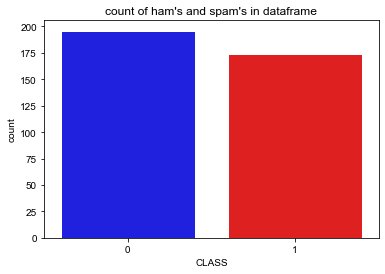

In [7]:
plt.title("count of ham's and spam's in dataframe")
sns.set(style="darkgrid")
sns.countplot(df.CLASS,palette=["blue","red"])
plt.legend

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.CONTENT,df.CLASS,test_size=0.3,random_state=1)

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(259,)
(259,)
(111,)
(111,)


In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [11]:
word_cv=cv.fit(x_train)
word_cv.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '108k',
 '128gb',
 '13',
 '14',
 '14gkvdo',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1bsefqe',
 '1hmvtx',
 '1m00s',
 '20',
 '2004',
 '200mm',
 '2013',
 '2015',
 '23',
 '25',
 '320',
 '32gb',
 '33',
 '333',
 '35',
 '360',
 '385',
 '387',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '433',
 '4500',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '500',
 '5000',
 '510',
 '515',
 '55',
 '550',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'air',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'ambition',
 'ambitious',
 'amendment',
 'american',
 'americans',
 'amia

In [12]:
doc_arr=word_cv.transform(x_train).toarray()
doc_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [13]:
feature_mat=pd.DataFrame(doc_arr,columns=word_cv.get_feature_names())
feature_mat

,00,000,10,100,108k,128gb,13,14,14gkvdo,15,...,youtube,youtubers,zealous,zonepa,ｃｏｍ,ｅｂａｙ,ｈｔｔｐ,ｓｈｏｅｃｏｌｌｅｃｔｏｒ314,ｕｓｒ,ｗｗｗ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid=TfidfVectorizer()

In [15]:
x_train_trans=tfid.fit_transform(x_train)
x_train_trans

<259x1121 sparse matrix of type '<class 'numpy.float64'>'
	with 3619 stored elements in Compressed Sparse Row format>

In [16]:
x_test_trans=tfid.transform(x_test)
x_test_trans

<111x1121 sparse matrix of type '<class 'numpy.float64'>'
	with 1440 stored elements in Compressed Sparse Row format>

In [17]:
tfid.get_feature_names()

['00',
 '000',
 '10',
 '100',
 '108k',
 '128gb',
 '13',
 '14',
 '14gkvdo',
 '15',
 '16gb',
 '17',
 '18',
 '19',
 '1bsefqe',
 '1hmvtx',
 '1m00s',
 '20',
 '2004',
 '200mm',
 '2013',
 '2015',
 '23',
 '25',
 '320',
 '32gb',
 '33',
 '333',
 '35',
 '360',
 '385',
 '387',
 '39',
 '390',
 '3d',
 '40',
 '4000',
 '421',
 '433',
 '4500',
 '4g',
 '4gb',
 '4netjobs',
 '4th',
 '500',
 '5000',
 '510',
 '515',
 '55',
 '550',
 '55mm',
 '5tu9gn1l310',
 '60',
 '600',
 '682',
 '753',
 '7in',
 '860',
 '868',
 'abominable',
 'abomination',
 'about',
 'absolutely',
 'absorbing',
 'account',
 'acquire',
 'acquiring',
 'act',
 'actually',
 'adam',
 'addition',
 'adf',
 'admirable',
 'adore',
 'adroid',
 'advertise',
 'advertisements',
 'advertisiments',
 'affiliated',
 'africa',
 'african',
 'africans',
 'after',
 'again',
 'against',
 'ago',
 'agree',
 'air',
 'album',
 'all',
 'alot',
 'already',
 'also',
 'always',
 'am',
 'amazing',
 'ambition',
 'ambitious',
 'amendment',
 'american',
 'americans',
 'amia

In [18]:
tfid.idf_

array([5.86753445, 4.61477148, 5.86753445, ..., 5.86753445, 5.86753445,
       5.86753445])

In [19]:
from sklearn.naive_bayes import BernoulliNB

bnb=BernoulliNB()

In [20]:
bnb.fit(x_train_trans,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [21]:
y_pred=bnb.predict(x_test_trans)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
confusion_matrix(y_test,y_pred)

array([[62,  0],
       [24, 25]], dtype=int64)

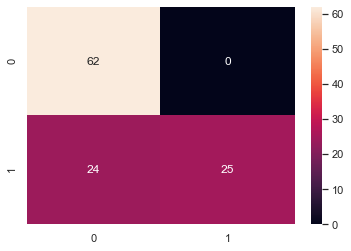

In [24]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d")

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        62
           1       1.00      0.51      0.68        49

    accuracy                           0.78       111
   macro avg       0.86      0.76      0.76       111
weighted avg       0.84      0.78      0.77       111



In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test,y_pred)

0.7837837837837838